In [1]:
card_type = "Spades"
model = "lstm"

In [2]:
# Parameters
card_type = "Diamonds"
model = "nn"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
n_outputs = 8
n_features = 8
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [7]:
spades_test_chance = test_chance[['Date',card_type]]
spades_test_chance = pd.merge(dummies,spades_test_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")

spades_train_chance = train_chance[['Date',card_type]]
spades_train_chance = pd.merge(dummies,spades_train_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")
spades_train_chance.head()

,0,1,2,3,4,5,6,7,Date,Diamonds
0,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006820,10
1,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006821,10
2,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006822,10
3,0,0,0,0,0,0,1,0,2001-01-01 00:00:00.006823,K
4,0,0,0,1,0,0,0,0,2001-02-01 00:00:00.006824,10


In [8]:
# make the samples ready to tsfresh
spades_test_chance = spades_test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = spades_train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0,1,2,3,4,5,6,7,Date,Diamonds,id
29119,1,0,0,0,0,0,0,0,2017-12-07 00:00:00.035924,7,1
29120,0,0,0,0,1,0,0,0,2017-12-07 00:00:00.035925,J,1
29121,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035926,Q,1
29122,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035927,8,1
29123,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035928,10,1


In [9]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:02<01:55,  2.97s/it]

Rolling:   8%|▊         | 3/40 [00:03<00:30,  1.23it/s]

Rolling:  15%|█▌        | 6/40 [00:04<00:18,  1.86it/s]

Rolling:  18%|█▊        | 7/40 [00:04<00:16,  2.02it/s]

Rolling:  20%|██        | 8/40 [00:04<00:14,  2.25it/s]

Rolling:  22%|██▎       | 9/40 [00:05<00:12,  2.45it/s]

Rolling:  25%|██▌       | 10/40 [00:05<00:11,  2.61it/s]

Rolling:  28%|██▊       | 11/40 [00:05<00:10,  2.67it/s]

Rolling:  30%|███       | 12/40 [00:05<00:08,  3.14it/s]

Rolling:  32%|███▎      | 13/40 [00:06<00:09,  2.97it/s]

Rolling:  35%|███▌      | 14/40 [00:06<00:09,  2.80it/s]

Rolling:  38%|███▊      | 15/40 [00:06<00:07,  3.31it/s]

Rolling:  40%|████      | 16/40 [00:07<00:06,  3.78it/s]

Rolling:  42%|████▎     | 17/40 [00:07<00:07,  3.10it/s]

Rolling:  45%|████▌     | 18/40 [00:07<00:06,  3.54it/s]

Rolling:  48%|████▊     | 19/40 [00:07<00:05,  3.95it/s]

Rolling:  50%|█████     | 20/40 [00:08<00:06,  3.00it/s]

Rolling:  52%|█████▎    | 21/40 [00:08<00:05,  3.40it/s]

Rolling:  55%|█████▌    | 22/40 [00:08<00:04,  3.87it/s]

Rolling:  57%|█████▊    | 23/40 [00:09<00:03,  4.26it/s]

Rolling:  60%|██████    | 24/40 [00:09<00:05,  2.87it/s]

Rolling:  62%|██████▎   | 25/40 [00:09<00:04,  3.37it/s]

Rolling:  65%|██████▌   | 26/40 [00:09<00:03,  3.86it/s]

Rolling:  68%|██████▊   | 27/40 [00:10<00:03,  4.26it/s]

Rolling:  70%|███████   | 28/40 [00:10<00:04,  2.72it/s]

Rolling:  72%|███████▎  | 29/40 [00:11<00:03,  3.21it/s]

Rolling:  75%|███████▌  | 30/40 [00:11<00:02,  3.67it/s]

Rolling:  78%|███████▊  | 31/40 [00:11<00:02,  4.12it/s]

Rolling:  80%|████████  | 32/40 [00:11<00:01,  4.45it/s]

Rolling:  82%|████████▎ | 33/40 [00:11<00:01,  4.71it/s]

Rolling:  85%|████████▌ | 34/40 [00:12<00:02,  2.65it/s]

Rolling:  88%|████████▊ | 35/40 [00:12<00:01,  3.22it/s]

Rolling:  90%|█████████ | 36/40 [00:12<00:01,  3.79it/s]

Rolling:  92%|█████████▎| 37/40 [00:12<00:00,  4.35it/s]

Rolling:  95%|█████████▌| 38/40 [00:13<00:00,  4.78it/s]

Rolling:  98%|█████████▊| 39/40 [00:13<00:00,  5.24it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  5.81it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:05<03:15,  5.02s/it]

Rolling:   5%|▌         | 2/40 [00:06<01:41,  2.66s/it]

Rolling:   8%|▊         | 3/40 [00:07<01:26,  2.34s/it]

Rolling:  10%|█         | 4/40 [00:08<01:01,  1.71s/it]

Rolling:  12%|█▎        | 5/40 [00:10<00:58,  1.68s/it]

Rolling:  15%|█▌        | 6/40 [00:10<00:44,  1.31s/it]

Rolling:  18%|█▊        | 7/40 [00:11<00:35,  1.07s/it]

Rolling:  20%|██        | 8/40 [00:12<00:29,  1.08it/s]

Rolling:  22%|██▎       | 9/40 [00:13<00:35,  1.16s/it]

Rolling:  25%|██▌       | 10/40 [00:14<00:29,  1.01it/s]

Rolling:  28%|██▊       | 11/40 [00:15<00:25,  1.16it/s]

Rolling:  30%|███       | 12/40 [00:15<00:21,  1.28it/s]

Rolling:  32%|███▎      | 13/40 [00:17<00:30,  1.14s/it]

Rolling:  35%|███▌      | 14/40 [00:18<00:25,  1.03it/s]

Rolling:  38%|███▊      | 15/40 [00:18<00:21,  1.15it/s]

Rolling:  40%|████      | 16/40 [00:19<00:18,  1.27it/s]

Rolling:  42%|████▎     | 17/40 [00:19<00:16,  1.36it/s]

Rolling:  45%|████▌     | 18/40 [00:22<00:27,  1.26s/it]

Rolling:  48%|████▊     | 19/40 [00:23<00:22,  1.06s/it]

Rolling:  50%|█████     | 20/40 [00:23<00:18,  1.09it/s]

Rolling:  52%|█████▎    | 21/40 [00:24<00:15,  1.24it/s]

Rolling:  55%|█████▌    | 22/40 [00:24<00:13,  1.35it/s]

Rolling:  57%|█████▊    | 23/40 [00:25<00:11,  1.42it/s]

Rolling:  60%|██████    | 24/40 [00:26<00:10,  1.47it/s]

Rolling:  62%|██████▎   | 25/40 [00:29<00:20,  1.40s/it]

Rolling:  65%|██████▌   | 26/40 [00:29<00:16,  1.15s/it]

Rolling:  68%|██████▊   | 27/40 [00:30<00:12,  1.02it/s]

Rolling:  70%|███████   | 28/40 [00:30<00:10,  1.17it/s]

Rolling:  72%|███████▎  | 29/40 [00:31<00:08,  1.29it/s]

Rolling:  75%|███████▌  | 30/40 [00:32<00:07,  1.36it/s]

Rolling:  78%|███████▊  | 31/40 [00:32<00:06,  1.41it/s]

Rolling:  80%|████████  | 32/40 [00:33<00:05,  1.41it/s]

Rolling:  82%|████████▎ | 33/40 [00:34<00:04,  1.42it/s]

Rolling:  85%|████████▌ | 34/40 [00:37<00:09,  1.53s/it]

Rolling:  88%|████████▊ | 35/40 [00:38<00:06,  1.25s/it]

Rolling:  90%|█████████ | 36/40 [00:38<00:04,  1.04s/it]

Rolling:  92%|█████████▎| 37/40 [00:39<00:02,  1.09it/s]

Rolling:  95%|█████████▌| 38/40 [00:39<00:01,  1.22it/s]

Rolling:  98%|█████████▊| 39/40 [00:40<00:00,  1.31it/s]

Rolling: 100%|██████████| 40/40 [00:40<00:00,  1.52it/s]

Rolling: 100%|██████████| 40/40 [00:40<00:00,  1.02s/it]

,0,1,2,3,4,5,6,7,Date,Diamonds,id
33509995,1,0,0,0,0,0,0,0,2017-12-07 00:00:00.035924,7,"(1, 2017-12-07 00:00:00.035928)"
33509996,0,0,0,0,1,0,0,0,2017-12-07 00:00:00.035925,J,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035926,Q,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035927,8,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035928,10,"(1, 2017-12-07 00:00:00.035928)"


In [10]:
test_labeling_df = test_chance[['lottoryNumber',card_type]]
train_labeling_df = train_chance[['lottoryNumber',card_type]]

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,lottoryNumber,Diamonds
29124,35944,7
29125,35945,K
29126,35946,Q
29127,35947,8
29128,35948,Q


In [11]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting][card_type]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date',card_type]).values

    return lottey_num_predicting,final_label,sample

In [12]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [13]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [14]:
test_x = np.stack(test_x)
test_y = pd.merge(dummies,pd.Series(test_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

train_x = np.stack(train_x)
train_y = pd.merge(dummies,pd.Series(train_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

In [15]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [16]:
last_sample = test_x[-1]
test_x = test_x[:-1]
test_y = test_y[:-1]

In [17]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 8)
Train shape (27925, 1200, 8)


In [18]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten (Flatten)           (None, 9600)              0         


 dense (Dense)               (None, 350)               3360350   


 dense_1 (Dense)             (None, 250)               87750     


 dense_2 (Dense)             (None, 150)               37650     


 dense_3 (Dense)             (None, 8)                 1208      


Total params: 3,486,958


Trainable params: 3,486,958


Non-trainable params: 0


_________________________________________________________________


2022-08-12 22:14:41.286941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any()

In [20]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)
# 
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 2:56 - loss: 2.1614 - accuracy: 0.0625

  6/437 [..............................] - ETA: 5s - loss: 2.1582 - accuracy: 0.1172  

 10/437 [..............................] - ETA: 5s - loss: 2.1419 - accuracy: 0.1187

 14/437 [..............................] - ETA: 5s - loss: 2.1367 - accuracy: 0.1373

 18/437 [>.............................] - ETA: 5s - loss: 2.1388 - accuracy: 0.1302

 22/437 [>.............................] - ETA: 5s - loss: 2.1351 - accuracy: 0.1278

 26/437 [>.............................] - ETA: 5s - loss: 2.1298 - accuracy: 0.1322

 30/437 [=>............................] - ETA: 5s - loss: 2.1280 - accuracy: 0.1349

 34/437 [=>............................] - ETA: 5s - loss: 2.1218 - accuracy: 0.1392

 38/437 [=>............................] - ETA: 5s - loss: 2.1193 - accuracy: 0.1369

 43/437 [=>............................] - ETA: 4s - loss: 2.1173 - accuracy: 0.1359

 47/437 [==>...........................] - ETA: 4s - loss: 2.1165 - accuracy: 0.1323

 52/437 [==>...........................] - ETA: 4s - loss: 2.1139 - accuracy: 0.1310

 56/437 [==>...........................] - ETA: 4s - loss: 2.1128 - accuracy: 0.1297

 60/437 [===>..........................] - ETA: 4s - loss: 2.1114 - accuracy: 0.1289

 64/437 [===>..........................] - ETA: 4s - loss: 2.1096 - accuracy: 0.1284

 68/437 [===>..........................] - ETA: 4s - loss: 2.1085 - accuracy: 0.1275

 73/437 [====>.........................] - ETA: 4s - loss: 2.1078 - accuracy: 0.1293

 78/437 [====>.........................] - ETA: 4s - loss: 2.1066 - accuracy: 0.1300

 83/437 [====>.........................] - ETA: 4s - loss: 2.1050 - accuracy: 0.1312

 88/437 [=====>........................] - ETA: 4s - loss: 2.1040 - accuracy: 0.1305

 93/437 [=====>........................] - ETA: 4s - loss: 2.1028 - accuracy: 0.1300

 98/437 [=====>........................] - ETA: 4s - loss: 2.1021 - accuracy: 0.1298

103/437 [======>.......................] - ETA: 4s - loss: 2.1008 - accuracy: 0.1309

108/437 [======>.......................] - ETA: 4s - loss: 2.1006 - accuracy: 0.1304

112/437 [======>.......................] - ETA: 4s - loss: 2.0998 - accuracy: 0.1304

116/437 [======>.......................] - ETA: 4s - loss: 2.0988 - accuracy: 0.1308

120/437 [=======>......................] - ETA: 3s - loss: 2.0990 - accuracy: 0.1310

124/437 [=======>......................] - ETA: 3s - loss: 2.0985 - accuracy: 0.1310

128/437 [=======>......................] - ETA: 3s - loss: 2.0982 - accuracy: 0.1299

132/437 [========>.....................] - ETA: 3s - loss: 2.0982 - accuracy: 0.1299

136/437 [========>.....................] - ETA: 3s - loss: 2.0977 - accuracy: 0.1290

140/437 [========>.....................] - ETA: 3s - loss: 2.0974 - accuracy: 0.1282

144/437 [========>.....................] - ETA: 3s - loss: 2.0973 - accuracy: 0.1276

148/437 [=========>....................] - ETA: 3s - loss: 2.0967 - accuracy: 0.1276

152/437 [=========>....................] - ETA: 3s - loss: 2.0962 - accuracy: 0.1281

156/437 [=========>....................] - ETA: 3s - loss: 2.0960 - accuracy: 0.1276

160/437 [=========>....................] - ETA: 3s - loss: 2.0956 - accuracy: 0.1280

164/437 [==========>...................] - ETA: 3s - loss: 2.0950 - accuracy: 0.1287

168/437 [==========>...................] - ETA: 3s - loss: 2.0947 - accuracy: 0.1284

173/437 [==========>...................] - ETA: 3s - loss: 2.0946 - accuracy: 0.1283

178/437 [===========>..................] - ETA: 3s - loss: 2.0942 - accuracy: 0.1282

183/437 [===========>..................] - ETA: 3s - loss: 2.0939 - accuracy: 0.1284

187/437 [===========>..................] - ETA: 3s - loss: 2.0936 - accuracy: 0.1289

191/437 [============>.................] - ETA: 3s - loss: 2.0935 - accuracy: 0.1282

196/437 [============>.................] - ETA: 3s - loss: 2.0933 - accuracy: 0.1279

201/437 [============>.................] - ETA: 2s - loss: 2.0930 - accuracy: 0.1282

206/437 [=============>................] - ETA: 2s - loss: 2.0927 - accuracy: 0.1285

210/437 [=============>................] - ETA: 2s - loss: 2.0925 - accuracy: 0.1283

215/437 [=============>................] - ETA: 2s - loss: 2.0922 - accuracy: 0.1286

219/437 [==============>...............] - ETA: 2s - loss: 2.0922 - accuracy: 0.1283

223/437 [==============>...............] - ETA: 2s - loss: 2.0921 - accuracy: 0.1281

227/437 [==============>...............] - ETA: 2s - loss: 2.0919 - accuracy: 0.1280

232/437 [==============>...............] - ETA: 2s - loss: 2.0917 - accuracy: 0.1281

236/437 [===============>..............] - ETA: 2s - loss: 2.0915 - accuracy: 0.1282

241/437 [===============>..............] - ETA: 2s - loss: 2.0912 - accuracy: 0.1286

246/437 [===============>..............] - ETA: 2s - loss: 2.0913 - accuracy: 0.1282

250/437 [================>.............] - ETA: 2s - loss: 2.0912 - accuracy: 0.1286

255/437 [================>.............] - ETA: 2s - loss: 2.0911 - accuracy: 0.1277

260/437 [================>.............] - ETA: 2s - loss: 2.0908 - accuracy: 0.1278

264/437 [=================>............] - ETA: 2s - loss: 2.0907 - accuracy: 0.1277

269/437 [=================>............] - ETA: 2s - loss: 2.0906 - accuracy: 0.1272

274/437 [=================>............] - ETA: 2s - loss: 2.0904 - accuracy: 0.1274

279/437 [==================>...........] - ETA: 2s - loss: 2.0903 - accuracy: 0.1268

283/437 [==================>...........] - ETA: 1s - loss: 2.0902 - accuracy: 0.1270

288/437 [==================>...........] - ETA: 1s - loss: 2.0900 - accuracy: 0.1277

293/437 [===================>..........] - ETA: 1s - loss: 2.0900 - accuracy: 0.1278

298/437 [===================>..........] - ETA: 1s - loss: 2.0899 - accuracy: 0.1279

303/437 [===================>..........] - ETA: 1s - loss: 2.0897 - accuracy: 0.1285

308/437 [====================>.........] - ETA: 1s - loss: 2.0898 - accuracy: 0.1286

313/437 [====================>.........] - ETA: 1s - loss: 2.0897 - accuracy: 0.1290

318/437 [====================>.........] - ETA: 1s - loss: 2.0897 - accuracy: 0.1291

322/437 [=====================>........] - ETA: 1s - loss: 2.0896 - accuracy: 0.1287

326/437 [=====================>........] - ETA: 1s - loss: 2.0895 - accuracy: 0.1286

331/437 [=====================>........] - ETA: 1s - loss: 2.0894 - accuracy: 0.1289

336/437 [======================>.......] - ETA: 1s - loss: 2.0893 - accuracy: 0.1293

340/437 [======================>.......] - ETA: 1s - loss: 2.0893 - accuracy: 0.1290

345/437 [======================>.......] - ETA: 1s - loss: 2.0892 - accuracy: 0.1292

350/437 [=======================>......] - ETA: 1s - loss: 2.0891 - accuracy: 0.1292

355/437 [=======================>......] - ETA: 1s - loss: 2.0890 - accuracy: 0.1287

359/437 [=======================>......] - ETA: 0s - loss: 2.0890 - accuracy: 0.1287

363/437 [=======================>......] - ETA: 0s - loss: 2.0889 - accuracy: 0.1288

367/437 [========================>.....] - ETA: 0s - loss: 2.0888 - accuracy: 0.1289

371/437 [========================>.....] - ETA: 0s - loss: 2.0886 - accuracy: 0.1295

375/437 [========================>.....] - ETA: 0s - loss: 2.0887 - accuracy: 0.1295

379/437 [=========================>....] - ETA: 0s - loss: 2.0885 - accuracy: 0.1298

383/437 [=========================>....] - ETA: 0s - loss: 2.0885 - accuracy: 0.1296

387/437 [=========================>....] - ETA: 0s - loss: 2.0884 - accuracy: 0.1295

391/437 [=========================>....] - ETA: 0s - loss: 2.0883 - accuracy: 0.1296

395/437 [==========================>...] - ETA: 0s - loss: 2.0882 - accuracy: 0.1294

399/437 [==========================>...] - ETA: 0s - loss: 2.0881 - accuracy: 0.1291

403/437 [==========================>...] - ETA: 0s - loss: 2.0881 - accuracy: 0.1290

407/437 [==========================>...] - ETA: 0s - loss: 2.0880 - accuracy: 0.1290

411/437 [===========================>..] - ETA: 0s - loss: 2.0879 - accuracy: 0.1290

415/437 [===========================>..] - ETA: 0s - loss: 2.0878 - accuracy: 0.1292

420/437 [===========================>..] - ETA: 0s - loss: 2.0877 - accuracy: 0.1293

424/437 [============================>.] - ETA: 0s - loss: 2.0877 - accuracy: 0.1292

428/437 [============================>.] - ETA: 0s - loss: 2.0875 - accuracy: 0.1292

432/437 [============================>.] - ETA: 0s - loss: 2.0875 - accuracy: 0.1293

437/437 [==============================] - ETA: 0s - loss: 2.0874 - accuracy: 0.1298

437/437 [==============================] - 7s 15ms/step - loss: 2.0874 - accuracy: 0.1298 - val_loss: 2.0818 - val_accuracy: 0.1213


Epoch 2/300


  1/437 [..............................] - ETA: 5s - loss: 2.0758 - accuracy: 0.0781

  6/437 [..............................] - ETA: 5s - loss: 2.0758 - accuracy: 0.1224

 11/437 [..............................] - ETA: 5s - loss: 2.0765 - accuracy: 0.1250

 15/437 [>.............................] - ETA: 5s - loss: 2.0770 - accuracy: 0.1281

 20/437 [>.............................] - ETA: 5s - loss: 2.0761 - accuracy: 0.1336

 25/437 [>.............................] - ETA: 5s - loss: 2.0752 - accuracy: 0.1412

 29/437 [>.............................] - ETA: 5s - loss: 2.0742 - accuracy: 0.1444

 34/437 [=>............................] - ETA: 4s - loss: 2.0735 - accuracy: 0.1471

 38/437 [=>............................] - ETA: 4s - loss: 2.0738 - accuracy: 0.1451

 42/437 [=>............................] - ETA: 4s - loss: 2.0733 - accuracy: 0.1443

 47/437 [==>...........................] - ETA: 4s - loss: 2.0738 - accuracy: 0.1439

 51/437 [==>...........................] - ETA: 4s - loss: 2.0735 - accuracy: 0.1437

 55/437 [==>...........................] - ETA: 4s - loss: 2.0745 - accuracy: 0.1412

 60/437 [===>..........................] - ETA: 4s - loss: 2.0766 - accuracy: 0.1391

 64/437 [===>..........................] - ETA: 4s - loss: 2.0766 - accuracy: 0.1382

 68/437 [===>..........................] - ETA: 4s - loss: 2.0766 - accuracy: 0.1397

 73/437 [====>.........................] - ETA: 4s - loss: 2.0765 - accuracy: 0.1393

 77/437 [====>.........................] - ETA: 4s - loss: 2.0765 - accuracy: 0.1382

 82/437 [====>.........................] - ETA: 4s - loss: 2.0773 - accuracy: 0.1357

 86/437 [====>.........................] - ETA: 4s - loss: 2.0769 - accuracy: 0.1352

 90/437 [=====>........................] - ETA: 4s - loss: 2.0765 - accuracy: 0.1356

 95/437 [=====>........................] - ETA: 4s - loss: 2.0775 - accuracy: 0.1345

100/437 [=====>........................] - ETA: 4s - loss: 2.0771 - accuracy: 0.1352

105/437 [======>.......................] - ETA: 4s - loss: 2.0769 - accuracy: 0.1362

110/437 [======>.......................] - ETA: 4s - loss: 2.0765 - accuracy: 0.1382

115/437 [======>.......................] - ETA: 4s - loss: 2.0766 - accuracy: 0.1379

120/437 [=======>......................] - ETA: 3s - loss: 2.0767 - accuracy: 0.1379

125/437 [=======>......................] - ETA: 3s - loss: 2.0765 - accuracy: 0.1389

130/437 [=======>......................] - ETA: 3s - loss: 2.0763 - accuracy: 0.1388

135/437 [========>.....................] - ETA: 3s - loss: 2.0762 - accuracy: 0.1394

140/437 [========>.....................] - ETA: 3s - loss: 2.0759 - accuracy: 0.1405

145/437 [========>.....................] - ETA: 3s - loss: 2.0759 - accuracy: 0.1411

150/437 [=========>....................] - ETA: 3s - loss: 2.0759 - accuracy: 0.1415

155/437 [=========>....................] - ETA: 3s - loss: 2.0757 - accuracy: 0.1419

160/437 [=========>....................] - ETA: 3s - loss: 2.0758 - accuracy: 0.1415

165/437 [==========>...................] - ETA: 3s - loss: 2.0758 - accuracy: 0.1422

170/437 [==========>...................] - ETA: 3s - loss: 2.0763 - accuracy: 0.1418

175/437 [===========>..................] - ETA: 3s - loss: 2.0761 - accuracy: 0.1421

179/437 [===========>..................] - ETA: 3s - loss: 2.0761 - accuracy: 0.1420

183/437 [===========>..................] - ETA: 3s - loss: 2.0760 - accuracy: 0.1423

187/437 [===========>..................] - ETA: 3s - loss: 2.0756 - accuracy: 0.1430

192/437 [============>.................] - ETA: 3s - loss: 2.0757 - accuracy: 0.1420

197/437 [============>.................] - ETA: 2s - loss: 2.0759 - accuracy: 0.1422

201/437 [============>.................] - ETA: 2s - loss: 2.0756 - accuracy: 0.1430

205/437 [=============>................] - ETA: 2s - loss: 2.0756 - accuracy: 0.1429

210/437 [=============>................] - ETA: 2s - loss: 2.0757 - accuracy: 0.1427

215/437 [=============>................] - ETA: 2s - loss: 2.0757 - accuracy: 0.1432

220/437 [==============>...............] - ETA: 2s - loss: 2.0754 - accuracy: 0.1444

224/437 [==============>...............] - ETA: 2s - loss: 2.0760 - accuracy: 0.1439

229/437 [==============>...............] - ETA: 2s - loss: 2.0761 - accuracy: 0.1440

234/437 [===============>..............] - ETA: 2s - loss: 2.0764 - accuracy: 0.1436

239/437 [===============>..............] - ETA: 2s - loss: 2.0763 - accuracy: 0.1434

243/437 [===============>..............] - ETA: 2s - loss: 2.0764 - accuracy: 0.1434

248/437 [================>.............] - ETA: 2s - loss: 2.0764 - accuracy: 0.1430

253/437 [================>.............] - ETA: 2s - loss: 2.0765 - accuracy: 0.1432

257/437 [================>.............] - ETA: 2s - loss: 2.0765 - accuracy: 0.1430

262/437 [================>.............] - ETA: 2s - loss: 2.0766 - accuracy: 0.1432

267/437 [=================>............] - ETA: 2s - loss: 2.0762 - accuracy: 0.1437

271/437 [=================>............] - ETA: 2s - loss: 2.0761 - accuracy: 0.1440

276/437 [=================>............] - ETA: 2s - loss: 2.0763 - accuracy: 0.1433

280/437 [==================>...........] - ETA: 1s - loss: 2.0763 - accuracy: 0.1434

285/437 [==================>...........] - ETA: 1s - loss: 2.0763 - accuracy: 0.1435

290/437 [==================>...........] - ETA: 1s - loss: 2.0763 - accuracy: 0.1435

294/437 [===================>..........] - ETA: 1s - loss: 2.0763 - accuracy: 0.1438

299/437 [===================>..........] - ETA: 1s - loss: 2.0763 - accuracy: 0.1440

304/437 [===================>..........] - ETA: 1s - loss: 2.0759 - accuracy: 0.1446

309/437 [====================>.........] - ETA: 1s - loss: 2.0762 - accuracy: 0.1442

313/437 [====================>.........] - ETA: 1s - loss: 2.0762 - accuracy: 0.1445

318/437 [====================>.........] - ETA: 1s - loss: 2.0762 - accuracy: 0.1443

323/437 [=====================>........] - ETA: 1s - loss: 2.0764 - accuracy: 0.1442

327/437 [=====================>........] - ETA: 1s - loss: 2.0763 - accuracy: 0.1444

332/437 [=====================>........] - ETA: 1s - loss: 2.0764 - accuracy: 0.1444

337/437 [======================>.......] - ETA: 1s - loss: 2.0764 - accuracy: 0.1445

342/437 [======================>.......] - ETA: 1s - loss: 2.0764 - accuracy: 0.1448

347/437 [======================>.......] - ETA: 1s - loss: 2.0765 - accuracy: 0.1446

352/437 [=======================>......] - ETA: 1s - loss: 2.0765 - accuracy: 0.1446

357/437 [=======================>......] - ETA: 0s - loss: 2.0767 - accuracy: 0.1443

362/437 [=======================>......] - ETA: 0s - loss: 2.0767 - accuracy: 0.1439

366/437 [========================>.....] - ETA: 0s - loss: 2.0766 - accuracy: 0.1438

371/437 [========================>.....] - ETA: 0s - loss: 2.0766 - accuracy: 0.1443

376/437 [========================>.....] - ETA: 0s - loss: 2.0764 - accuracy: 0.1445

381/437 [=========================>....] - ETA: 0s - loss: 2.0765 - accuracy: 0.1443

386/437 [=========================>....] - ETA: 0s - loss: 2.0765 - accuracy: 0.1447

391/437 [=========================>....] - ETA: 0s - loss: 2.0765 - accuracy: 0.1446

396/437 [==========================>...] - ETA: 0s - loss: 2.0763 - accuracy: 0.1449

401/437 [==========================>...] - ETA: 0s - loss: 2.0763 - accuracy: 0.1448

406/437 [==========================>...] - ETA: 0s - loss: 2.0762 - accuracy: 0.1453

411/437 [===========================>..] - ETA: 0s - loss: 2.0760 - accuracy: 0.1453

416/437 [===========================>..] - ETA: 0s - loss: 2.0763 - accuracy: 0.1449

421/437 [===========================>..] - ETA: 0s - loss: 2.0763 - accuracy: 0.1446

426/437 [============================>.] - ETA: 0s - loss: 2.0763 - accuracy: 0.1446

431/437 [============================>.] - ETA: 0s - loss: 2.0762 - accuracy: 0.1448

436/437 [============================>.] - ETA: 0s - loss: 2.0762 - accuracy: 0.1448

437/437 [==============================] - 6s 14ms/step - loss: 2.0762 - accuracy: 0.1447 - val_loss: 2.0827 - val_accuracy: 0.1228


Epoch 3/300


  1/437 [..............................] - ETA: 4s - loss: 2.0480 - accuracy: 0.1875

  6/437 [..............................] - ETA: 5s - loss: 2.0512 - accuracy: 0.1797

 10/437 [..............................] - ETA: 5s - loss: 2.0395 - accuracy: 0.2094

 15/437 [>.............................] - ETA: 5s - loss: 2.0283 - accuracy: 0.2198

 20/437 [>.............................] - ETA: 5s - loss: 2.0207 - accuracy: 0.2227

 25/437 [>.............................] - ETA: 5s - loss: 2.0005 - accuracy: 0.2338

 30/437 [=>............................] - ETA: 4s - loss: 1.9877 - accuracy: 0.2385

 35/437 [=>............................] - ETA: 4s - loss: 1.9837 - accuracy: 0.2384

 39/437 [=>............................] - ETA: 4s - loss: 1.9776 - accuracy: 0.2428

 43/437 [=>............................] - ETA: 4s - loss: 1.9779 - accuracy: 0.2395

 47/437 [==>...........................] - ETA: 4s - loss: 1.9752 - accuracy: 0.2380

 51/437 [==>...........................] - ETA: 4s - loss: 1.9750 - accuracy: 0.2390

 55/437 [==>...........................] - ETA: 4s - loss: 1.9762 - accuracy: 0.2395

 59/437 [===>..........................] - ETA: 4s - loss: 1.9755 - accuracy: 0.2360

 63/437 [===>..........................] - ETA: 4s - loss: 1.9763 - accuracy: 0.2354

 67/437 [===>..........................] - ETA: 4s - loss: 1.9754 - accuracy: 0.2332

 71/437 [===>..........................] - ETA: 4s - loss: 1.9772 - accuracy: 0.2320

 76/437 [====>.........................] - ETA: 4s - loss: 1.9795 - accuracy: 0.2301

 80/437 [====>.........................] - ETA: 4s - loss: 1.9816 - accuracy: 0.2268

 84/437 [====>.........................] - ETA: 4s - loss: 1.9812 - accuracy: 0.2262

 88/437 [=====>........................] - ETA: 4s - loss: 1.9794 - accuracy: 0.2280

 92/437 [=====>........................] - ETA: 4s - loss: 1.9817 - accuracy: 0.2272

 96/437 [=====>........................] - ETA: 4s - loss: 1.9809 - accuracy: 0.2269

101/437 [=====>........................] - ETA: 4s - loss: 1.9808 - accuracy: 0.2269

105/437 [======>.......................] - ETA: 4s - loss: 1.9810 - accuracy: 0.2271

109/437 [======>.......................] - ETA: 4s - loss: 1.9789 - accuracy: 0.2291

113/437 [======>.......................] - ETA: 4s - loss: 1.9789 - accuracy: 0.2287

117/437 [=======>......................] - ETA: 4s - loss: 1.9798 - accuracy: 0.2266

122/437 [=======>......................] - ETA: 4s - loss: 1.9783 - accuracy: 0.2294

127/437 [=======>......................] - ETA: 3s - loss: 1.9782 - accuracy: 0.2292

132/437 [========>.....................] - ETA: 3s - loss: 1.9798 - accuracy: 0.2285

137/437 [========>.....................] - ETA: 3s - loss: 1.9792 - accuracy: 0.2292

142/437 [========>.....................] - ETA: 3s - loss: 1.9790 - accuracy: 0.2292

147/437 [=========>....................] - ETA: 3s - loss: 1.9788 - accuracy: 0.2285

152/437 [=========>....................] - ETA: 3s - loss: 1.9789 - accuracy: 0.2284

157/437 [=========>....................] - ETA: 3s - loss: 1.9783 - accuracy: 0.2285

161/437 [==========>...................] - ETA: 3s - loss: 1.9796 - accuracy: 0.2280

165/437 [==========>...................] - ETA: 3s - loss: 1.9801 - accuracy: 0.2278

169/437 [==========>...................] - ETA: 3s - loss: 1.9800 - accuracy: 0.2287

173/437 [==========>...................] - ETA: 3s - loss: 1.9818 - accuracy: 0.2271

177/437 [===========>..................] - ETA: 3s - loss: 1.9824 - accuracy: 0.2263

182/437 [===========>..................] - ETA: 3s - loss: 1.9833 - accuracy: 0.2268

186/437 [===========>..................] - ETA: 3s - loss: 1.9842 - accuracy: 0.2270

190/437 [============>.................] - ETA: 3s - loss: 1.9841 - accuracy: 0.2273

194/437 [============>.................] - ETA: 3s - loss: 1.9845 - accuracy: 0.2267

198/437 [============>.................] - ETA: 3s - loss: 1.9858 - accuracy: 0.2253

202/437 [============>.................] - ETA: 2s - loss: 1.9863 - accuracy: 0.2246

206/437 [=============>................] - ETA: 2s - loss: 1.9879 - accuracy: 0.2241

211/437 [=============>................] - ETA: 2s - loss: 1.9881 - accuracy: 0.2236

216/437 [=============>................] - ETA: 2s - loss: 1.9889 - accuracy: 0.2227

220/437 [==============>...............] - ETA: 2s - loss: 1.9886 - accuracy: 0.2225

225/437 [==============>...............] - ETA: 2s - loss: 1.9894 - accuracy: 0.2220

229/437 [==============>...............] - ETA: 2s - loss: 1.9898 - accuracy: 0.2216

233/437 [==============>...............] - ETA: 2s - loss: 1.9895 - accuracy: 0.2210

237/437 [===============>..............] - ETA: 2s - loss: 1.9900 - accuracy: 0.2203

242/437 [===============>..............] - ETA: 2s - loss: 1.9906 - accuracy: 0.2201

247/437 [===============>..............] - ETA: 2s - loss: 1.9909 - accuracy: 0.2198

251/437 [================>.............] - ETA: 2s - loss: 1.9911 - accuracy: 0.2192

256/437 [================>.............] - ETA: 2s - loss: 1.9917 - accuracy: 0.2185

260/437 [================>.............] - ETA: 2s - loss: 1.9915 - accuracy: 0.2181

264/437 [=================>............] - ETA: 2s - loss: 1.9913 - accuracy: 0.2185

269/437 [=================>............] - ETA: 2s - loss: 1.9920 - accuracy: 0.2182

274/437 [=================>............] - ETA: 2s - loss: 1.9927 - accuracy: 0.2182

278/437 [==================>...........] - ETA: 2s - loss: 1.9934 - accuracy: 0.2173

282/437 [==================>...........] - ETA: 1s - loss: 1.9936 - accuracy: 0.2173

287/437 [==================>...........] - ETA: 1s - loss: 1.9936 - accuracy: 0.2172

292/437 [===================>..........] - ETA: 1s - loss: 1.9936 - accuracy: 0.2166

297/437 [===================>..........] - ETA: 1s - loss: 1.9935 - accuracy: 0.2166

302/437 [===================>..........] - ETA: 1s - loss: 1.9935 - accuracy: 0.2166

307/437 [====================>.........] - ETA: 1s - loss: 1.9934 - accuracy: 0.2168

312/437 [====================>.........] - ETA: 1s - loss: 1.9937 - accuracy: 0.2167

317/437 [====================>.........] - ETA: 1s - loss: 1.9938 - accuracy: 0.2165

321/437 [=====================>........] - ETA: 1s - loss: 1.9937 - accuracy: 0.2159

326/437 [=====================>........] - ETA: 1s - loss: 1.9945 - accuracy: 0.2152

331/437 [=====================>........] - ETA: 1s - loss: 1.9946 - accuracy: 0.2153

335/437 [=====================>........] - ETA: 1s - loss: 1.9942 - accuracy: 0.2160

339/437 [======================>.......] - ETA: 1s - loss: 1.9945 - accuracy: 0.2156

344/437 [======================>.......] - ETA: 1s - loss: 1.9947 - accuracy: 0.2156

349/437 [======================>.......] - ETA: 1s - loss: 1.9946 - accuracy: 0.2158

354/437 [=======================>......] - ETA: 1s - loss: 1.9948 - accuracy: 0.2161

359/437 [=======================>......] - ETA: 0s - loss: 1.9946 - accuracy: 0.2164

363/437 [=======================>......] - ETA: 0s - loss: 1.9947 - accuracy: 0.2162

368/437 [========================>.....] - ETA: 0s - loss: 1.9947 - accuracy: 0.2159

372/437 [========================>.....] - ETA: 0s - loss: 1.9950 - accuracy: 0.2155

376/437 [========================>.....] - ETA: 0s - loss: 1.9951 - accuracy: 0.2157

381/437 [=========================>....] - ETA: 0s - loss: 1.9949 - accuracy: 0.2161

386/437 [=========================>....] - ETA: 0s - loss: 1.9949 - accuracy: 0.2158

390/437 [=========================>....] - ETA: 0s - loss: 1.9947 - accuracy: 0.2162

394/437 [==========================>...] - ETA: 0s - loss: 1.9951 - accuracy: 0.2166

398/437 [==========================>...] - ETA: 0s - loss: 1.9951 - accuracy: 0.2162

403/437 [==========================>...] - ETA: 0s - loss: 1.9952 - accuracy: 0.2163

408/437 [===========================>..] - ETA: 0s - loss: 1.9954 - accuracy: 0.2164

412/437 [===========================>..] - ETA: 0s - loss: 1.9953 - accuracy: 0.2165

416/437 [===========================>..] - ETA: 0s - loss: 1.9955 - accuracy: 0.2165

420/437 [===========================>..] - ETA: 0s - loss: 1.9952 - accuracy: 0.2164

425/437 [============================>.] - ETA: 0s - loss: 1.9949 - accuracy: 0.2168

430/437 [============================>.] - ETA: 0s - loss: 1.9948 - accuracy: 0.2171

434/437 [============================>.] - ETA: 0s - loss: 1.9948 - accuracy: 0.2172

437/437 [==============================] - 6s 14ms/step - loss: 1.9948 - accuracy: 0.2172 - val_loss: 2.1837 - val_accuracy: 0.1267


Epoch 4/300


  1/437 [..............................] - ETA: 4s - loss: 1.7819 - accuracy: 0.3906

  6/437 [..............................] - ETA: 5s - loss: 1.6948 - accuracy: 0.4036

 11/437 [..............................] - ETA: 5s - loss: 1.6672 - accuracy: 0.4048

 15/437 [>.............................] - ETA: 5s - loss: 1.6496 - accuracy: 0.4062

 20/437 [>.............................] - ETA: 5s - loss: 1.6258 - accuracy: 0.4125

 25/437 [>.............................] - ETA: 5s - loss: 1.6075 - accuracy: 0.4206

 30/437 [=>............................] - ETA: 4s - loss: 1.5950 - accuracy: 0.4266

 35/437 [=>............................] - ETA: 4s - loss: 1.5766 - accuracy: 0.4259

 40/437 [=>............................] - ETA: 4s - loss: 1.5708 - accuracy: 0.4266

 45/437 [==>...........................] - ETA: 4s - loss: 1.5632 - accuracy: 0.4281

 49/437 [==>...........................] - ETA: 4s - loss: 1.5540 - accuracy: 0.4311

 54/437 [==>...........................] - ETA: 4s - loss: 1.5591 - accuracy: 0.4308

 59/437 [===>..........................] - ETA: 4s - loss: 1.5571 - accuracy: 0.4330

 63/437 [===>..........................] - ETA: 4s - loss: 1.5546 - accuracy: 0.4343

 67/437 [===>..........................] - ETA: 4s - loss: 1.5514 - accuracy: 0.4363

 71/437 [===>..........................] - ETA: 4s - loss: 1.5512 - accuracy: 0.4351

 75/437 [====>.........................] - ETA: 4s - loss: 1.5534 - accuracy: 0.4348

 79/437 [====>.........................] - ETA: 4s - loss: 1.5563 - accuracy: 0.4343

 83/437 [====>.........................] - ETA: 4s - loss: 1.5588 - accuracy: 0.4320

 87/437 [====>.........................] - ETA: 4s - loss: 1.5560 - accuracy: 0.4323

 91/437 [=====>........................] - ETA: 4s - loss: 1.5552 - accuracy: 0.4329

 95/437 [=====>........................] - ETA: 4s - loss: 1.5573 - accuracy: 0.4316

 99/437 [=====>........................] - ETA: 4s - loss: 1.5562 - accuracy: 0.4312

103/437 [======>.......................] - ETA: 4s - loss: 1.5599 - accuracy: 0.4301

107/437 [======>.......................] - ETA: 4s - loss: 1.5618 - accuracy: 0.4305

111/437 [======>.......................] - ETA: 4s - loss: 1.5614 - accuracy: 0.4305

115/437 [======>.......................] - ETA: 4s - loss: 1.5635 - accuracy: 0.4306

119/437 [=======>......................] - ETA: 4s - loss: 1.5681 - accuracy: 0.4292

123/437 [=======>......................] - ETA: 3s - loss: 1.5652 - accuracy: 0.4311

127/437 [=======>......................] - ETA: 3s - loss: 1.5697 - accuracy: 0.4280

131/437 [=======>......................] - ETA: 3s - loss: 1.5714 - accuracy: 0.4266

135/437 [========>.....................] - ETA: 3s - loss: 1.5730 - accuracy: 0.4262

139/437 [========>.....................] - ETA: 3s - loss: 1.5747 - accuracy: 0.4243

143/437 [========>.....................] - ETA: 3s - loss: 1.5780 - accuracy: 0.4222

147/437 [=========>....................] - ETA: 3s - loss: 1.5793 - accuracy: 0.4217

151/437 [=========>....................] - ETA: 3s - loss: 1.5809 - accuracy: 0.4203

155/437 [=========>....................] - ETA: 3s - loss: 1.5863 - accuracy: 0.4175

159/437 [=========>....................] - ETA: 3s - loss: 1.5881 - accuracy: 0.4166

163/437 [==========>...................] - ETA: 3s - loss: 1.5900 - accuracy: 0.4159

167/437 [==========>...................] - ETA: 3s - loss: 1.5910 - accuracy: 0.4151

171/437 [==========>...................] - ETA: 3s - loss: 1.5910 - accuracy: 0.4141

175/437 [===========>..................] - ETA: 3s - loss: 1.5951 - accuracy: 0.4121

179/437 [===========>..................] - ETA: 3s - loss: 1.5965 - accuracy: 0.4110

183/437 [===========>..................] - ETA: 3s - loss: 1.5976 - accuracy: 0.4111

187/437 [===========>..................] - ETA: 3s - loss: 1.5990 - accuracy: 0.4098

191/437 [============>.................] - ETA: 3s - loss: 1.5992 - accuracy: 0.4095

195/437 [============>.................] - ETA: 3s - loss: 1.6001 - accuracy: 0.4096

199/437 [============>.................] - ETA: 3s - loss: 1.6013 - accuracy: 0.4092

204/437 [=============>................] - ETA: 3s - loss: 1.6026 - accuracy: 0.4095

209/437 [=============>................] - ETA: 3s - loss: 1.6025 - accuracy: 0.4103

214/437 [=============>................] - ETA: 2s - loss: 1.6046 - accuracy: 0.4089

218/437 [=============>................] - ETA: 2s - loss: 1.6057 - accuracy: 0.4081

223/437 [==============>...............] - ETA: 2s - loss: 1.6070 - accuracy: 0.4065

228/437 [==============>...............] - ETA: 2s - loss: 1.6076 - accuracy: 0.4062

232/437 [==============>...............] - ETA: 2s - loss: 1.6066 - accuracy: 0.4069

236/437 [===============>..............] - ETA: 2s - loss: 1.6074 - accuracy: 0.4062

240/437 [===============>..............] - ETA: 2s - loss: 1.6088 - accuracy: 0.4057

244/437 [===============>..............] - ETA: 2s - loss: 1.6095 - accuracy: 0.4057

248/437 [================>.............] - ETA: 2s - loss: 1.6106 - accuracy: 0.4053

253/437 [================>.............] - ETA: 2s - loss: 1.6115 - accuracy: 0.4048

257/437 [================>.............] - ETA: 2s - loss: 1.6125 - accuracy: 0.4042

261/437 [================>.............] - ETA: 2s - loss: 1.6134 - accuracy: 0.4040

266/437 [=================>............] - ETA: 2s - loss: 1.6125 - accuracy: 0.4048

271/437 [=================>............] - ETA: 2s - loss: 1.6135 - accuracy: 0.4044

275/437 [=================>............] - ETA: 2s - loss: 1.6139 - accuracy: 0.4046

279/437 [==================>...........] - ETA: 2s - loss: 1.6146 - accuracy: 0.4043

283/437 [==================>...........] - ETA: 2s - loss: 1.6152 - accuracy: 0.4039

287/437 [==================>...........] - ETA: 1s - loss: 1.6151 - accuracy: 0.4034

291/437 [==================>...........] - ETA: 1s - loss: 1.6163 - accuracy: 0.4025

295/437 [===================>..........] - ETA: 1s - loss: 1.6163 - accuracy: 0.4022

299/437 [===================>..........] - ETA: 1s - loss: 1.6157 - accuracy: 0.4021

303/437 [===================>..........] - ETA: 1s - loss: 1.6170 - accuracy: 0.4018

307/437 [====================>.........] - ETA: 1s - loss: 1.6186 - accuracy: 0.4012

311/437 [====================>.........] - ETA: 1s - loss: 1.6196 - accuracy: 0.4003

315/437 [====================>.........] - ETA: 1s - loss: 1.6199 - accuracy: 0.4000

319/437 [====================>.........] - ETA: 1s - loss: 1.6209 - accuracy: 0.3993

324/437 [=====================>........] - ETA: 1s - loss: 1.6221 - accuracy: 0.3989

329/437 [=====================>........] - ETA: 1s - loss: 1.6239 - accuracy: 0.3983

333/437 [=====================>........] - ETA: 1s - loss: 1.6240 - accuracy: 0.3986

337/437 [======================>.......] - ETA: 1s - loss: 1.6259 - accuracy: 0.3979

341/437 [======================>.......] - ETA: 1s - loss: 1.6273 - accuracy: 0.3969

345/437 [======================>.......] - ETA: 1s - loss: 1.6283 - accuracy: 0.3962

349/437 [======================>.......] - ETA: 1s - loss: 1.6299 - accuracy: 0.3958

353/437 [=======================>......] - ETA: 1s - loss: 1.6306 - accuracy: 0.3955

357/437 [=======================>......] - ETA: 1s - loss: 1.6318 - accuracy: 0.3950

361/437 [=======================>......] - ETA: 0s - loss: 1.6329 - accuracy: 0.3944

365/437 [========================>.....] - ETA: 0s - loss: 1.6323 - accuracy: 0.3949

369/437 [========================>.....] - ETA: 0s - loss: 1.6327 - accuracy: 0.3950

373/437 [========================>.....] - ETA: 0s - loss: 1.6344 - accuracy: 0.3942

377/437 [========================>.....] - ETA: 0s - loss: 1.6350 - accuracy: 0.3940

381/437 [=========================>....] - ETA: 0s - loss: 1.6351 - accuracy: 0.3942

385/437 [=========================>....] - ETA: 0s - loss: 1.6358 - accuracy: 0.3939

389/437 [=========================>....] - ETA: 0s - loss: 1.6371 - accuracy: 0.3933

393/437 [=========================>....] - ETA: 0s - loss: 1.6385 - accuracy: 0.3928

397/437 [==========================>...] - ETA: 0s - loss: 1.6396 - accuracy: 0.3923

401/437 [==========================>...] - ETA: 0s - loss: 1.6403 - accuracy: 0.3922

405/437 [==========================>...] - ETA: 0s - loss: 1.6406 - accuracy: 0.3920

409/437 [===========================>..] - ETA: 0s - loss: 1.6412 - accuracy: 0.3920

413/437 [===========================>..] - ETA: 0s - loss: 1.6416 - accuracy: 0.3917

417/437 [===========================>..] - ETA: 0s - loss: 1.6420 - accuracy: 0.3916

421/437 [===========================>..] - ETA: 0s - loss: 1.6423 - accuracy: 0.3912

425/437 [============================>.] - ETA: 0s - loss: 1.6421 - accuracy: 0.3913

429/437 [============================>.] - ETA: 0s - loss: 1.6432 - accuracy: 0.3908

433/437 [============================>.] - ETA: 0s - loss: 1.6436 - accuracy: 0.3905

437/437 [==============================] - ETA: 0s - loss: 1.6442 - accuracy: 0.3901

437/437 [==============================] - 6s 15ms/step - loss: 1.6442 - accuracy: 0.3901 - val_loss: 2.3921 - val_accuracy: 0.1226


Epoch 4: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


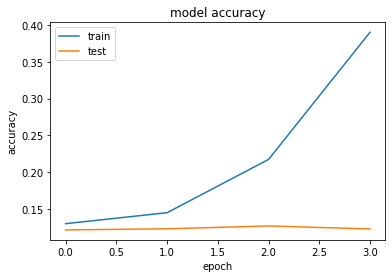

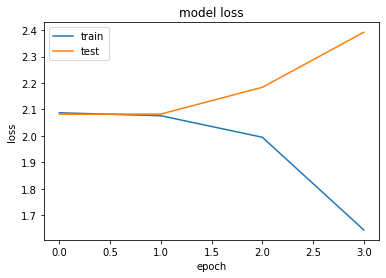

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 18s

 23/266 [=>............................] - ETA: 0s 

 45/266 [====>.........................] - ETA: 0s

 67/266 [======>.......................] - ETA: 0s

 89/266 [=========>....................] - ETA: 0s

111/266 [===========>..................] - ETA: 0s

131/266 [=============>................] - ETA: 0s

149/266 [===============>..............] - ETA: 0s

166/266 [=================>............] - ETA: 0s

184/266 [===================>..........] - ETA: 0s

203/266 [=====================>........] - ETA: 0s

221/266 [=======================>......] - ETA: 0s

237/266 [=========================>....] - ETA: 0s

257/266 [===========================>..] - ETA: 0s

266/266 [==============================] - 1s 3ms/step


In [23]:
predictions_cards = get_card_from_encoding(predictions)
true_cards = get_card_from_encoding(test_y)

compute_statistics(predictions_cards,true_cards)

{'name': UUID('7735b6e7-2872-4cee-a4c3-696fb0f7d30c'),
 'invested': '£850,900.00',
 'single_bet_amount': '£100.00',
 'total_invested': '£850,900.00',
 'total_won': 1043,
 'precentage_won': 12.257609589846046,
 'expected_won': 12.5,
 'eraned': '£521,500.00',
 'revenue': '-£329,400.00'}